<a href="https://colab.research.google.com/github/helookscool/DEEP_Learning_Machine_129/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EA%B8%B0%EB%B3%B8/7_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 학습

## 단순한 신경망 구현 : Logic Gate

### 필요한 모듈 import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

### 하이퍼 파라미터(Hyper Parameter)
사용자로부터 지정되고 이미 보델 학습전에 지정되서 상수화되어 있는게 보통이다.

In [2]:
epochs = 1000
lr = 0.2 #학습률임


### 유틸 함수들(Util Functions)
필요한 함수들을 직접 만들어서 써보자.

In [3]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def mean_squared_error(pred_y, true_y):
  return 0.5 * (np.sum((true_y - pred_y)**2))

def MSE(y, pred_y): #뭔 MSE코드오류라는데 위의 코드가 틀린듯. 근데 강의는 그냥 진행됨.
  return np.mean(np.sum(np.square((y - pred_y))))

def cross_entropy_error(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1, -1)

  delta = 1e-7
  return -np.sum(true_y * np.log(pred_y + dleta))
  #로그함수에 0대입하면 무한대로 가버리니까, -무한대로 가지 않게 하는 아주 작은 델타값을 더해준다. 

def cross_entropy_error_for_batch(pred_y, true_y):#벳치의 경우 상정. 
#벳치사이즈로 구분해서 계산하다보면 베치 사이즈로 각 값들을 나눠줘야한다.
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1, -1)

  delta = 1e-7
  batch_size = pred_y.shape[0]
  return -np.sum(true_y * np.log(pred_y + dleta)) / batch_size 

def cross_entropy_error_for_bin(pred_y, true_y):
  return 0.5 * np.sum((-true_y * np.log(pred_y) - (1- true_y) * np.log(1-pred_y)))

def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

def diffrential(f, x):
  eps = 1e-5 #작은 앱실론 값을 주고...
  diff_value = np.zeros_like(x) #크기는 x인데 내용물을 0으로 채운 배열하나 만들어주고...

  for i in range(x.shape[0]):
    temp_val = x[i]
    
    x[i] = temp_val + eps
    f_h1 = f(x)

    x[i] = temp_val - eps
    f_h2 = f(x)

    diff_value[i] = (f_h1 - f_h2) / (2 * eps)
    x[i] = temp_val

  return diff_value

### 신경망

In [4]:
class LogicGateNet():

  def __init__(self):
    def weight_init():
      np.random.seed(1)
      #가중치, 바이어스 다 초기화 해줘야됨.
      weights = np.random.randn(2)
      bias = np.random.rand(1)

      return weights, bias

    self.weights, self.bias = weight_init() #여기까지가 초기화 과정임.

  def predict(self, x):
    W = self.weights.reshape(-1, 1)
    b = self.bias

    pred_y = sigmoid(np.dot(x, W) + b)#활성화 함수
    return pred_y

  def loss(self, x, true_y): #손실함수
    pred_y = self.predict(x)
    return cross_entropy_error_for_bin(pred_y, true_y)

  def get_gradient(self, x, t): #그레디언트 값을 구한다는데?
    def loss_grad(grad):
      return self.loss(x, t)

  #그레디언트를 다 반영하기 위해서 loss값에다 그레디언트를 반영하는 과정?
    grad_W = diffrential(loss_grad, self.weights)
    grad_B = diffrential(loss_grad, self.bias)

    return grad_W, grad_B

### AND Gate




#### 모델 생성 및 학습

In [5]:
#AND게이트는 둘다 1 일때만 1이다. 
AND = LogicGateNet()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [0], [0], [1]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = AND.get_gradient(X,Y)

  AND.weights -= lr * grad_W
  AND.bias -= lr * grad_B

  loss = AND.loss(X, Y)
  train_loss_list.append(loss) #현재 LOSS값이 몇인지 리스트에 저장해줌

  if i % 100 == 99:
    print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, AND.weights, AND.bias))

Epoch: 100, Cost: 0.49396867843617975, Weights: [2.01503856 1.71662117], Bias: [-3.08282757]
Epoch: 200, Cost: 0.3253343795271425, Weights: [2.79693855 2.73539701], Bias: [-4.37630256]
Epoch: 300, Cost: 0.24302342001811633, Weights: [3.40228815 3.3848267 ], Bias: [-5.29773137]
Epoch: 400, Cost: 0.19344240185905218, Weights: [3.8824553  3.87626796], Bias: [-6.01648561]
Epoch: 500, Cost: 0.16029457035245787, Weights: [4.27734849 4.27477562], Bias: [-6.60554348]
Epoch: 600, Cost: 0.13661422486224933, Weights: [4.61168928 4.6104836 ], Bias: [-7.10408809]
Epoch: 700, Cost: 0.11888494243349108, Weights: [4.9011229  4.90050339], Bias: [-7.5358348]
Epoch: 800, Cost: 0.10513498469279867, Weights: [5.15603123 5.15568883], Bias: [-7.91628056]
Epoch: 900, Cost: 0.09417321088544701, Weights: [5.38361567 5.38341492], Bias: [-8.25611777]
Epoch: 1000, Cost: 0.08523824303938289, Weights: [5.58906188 5.58893832], Bias: [-8.56303389]


#### 테스트

In [6]:
print(AND.predict(X))

[[1.91002335e-04]
 [4.86099648e-02]
 [4.86156795e-02]
 [9.31818598e-01]]


### OR Gate

#### 모델 생성 및 학습

In [7]:
OR = LogicGateNet()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_2 = np.array([[0], [1], [1], [1]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = OR.get_gradient(X,Y_2)

  OR.weights -= lr * grad_W
  OR.bias -= lr * grad_B

  loss = OR.loss(X, Y_2)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, OR.weights, OR.bias))

Epoch: 100, Cost: 0.3393288167819607, Weights: [2.98831871 2.39880239], Bias: [-0.67875835]
Epoch: 200, Cost: 0.2060032953656718, Weights: [3.85457519 3.61235159], Bias: [-1.30773792]
Epoch: 300, Cost: 0.14646151032997104, Weights: [4.51092321 4.38480447], Bias: [-1.70090032]
Epoch: 400, Cost: 0.1129747092174115, Weights: [5.02588551 4.94993214], Bias: [-1.98818437]
Epoch: 500, Cost: 0.09165264913456045, Weights: [5.44543336 5.39513131], Bias: [-2.21445381]
Epoch: 600, Cost: 0.07695035178050828, Weights: [5.79774684 5.76215647], Bias: [-2.40088812]
Epoch: 700, Cost: 0.0662299812387976, Weights: [6.10062111 6.0741922 ], Bias: [-2.55926578]
Epoch: 800, Cost: 0.05808247762977344, Weights: [6.3658123  6.34545117], Bias: [-2.69682842]
Epoch: 900, Cost: 0.051689427544127094, Weights: [6.60142242 6.58527659], Bias: [-2.81834678]
Epoch: 1000, Cost: 0.04654419034600559, Weights: [6.81324253 6.80013851], Bias: [-2.9271287]


#### 테스트

In [8]:
print(OR.predict(X))

[[0.05082867]
 [0.97962797]
 [0.97988785]
 [0.99997714]]


### NAND Gate

#### 모델 생성 및 학습

In [9]:
NAND = LogicGateNet()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_3 = np.array([[1], [1], [1], [0]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = NAND.get_gradient(X,Y_3)

  NAND.weights -= lr * grad_W
  NAND.bias -= lr * grad_B

  loss = NAND.loss(X, Y_3)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, NAND.weights, NAND.bias))

Epoch: 100, Cost: 0.5421738801873841, Weights: [-1.52038477 -1.8044596 ], Bias: [2.79613861]
Epoch: 200, Cost: 0.34513921235779443, Weights: [-2.61076184 -2.66551134], Bias: [4.18950611]
Epoch: 300, Cost: 0.25403140982901523, Weights: [-3.29126404 -3.30609336], Bias: [5.15778594]
Epoch: 400, Cost: 0.20045713974610346, Weights: [-3.80128706 -3.80637256], Bias: [5.90451903]
Epoch: 500, Cost: 0.1651450652487038, Weights: [-4.21231761 -4.21438224], Bias: [6.51232147]
Epoch: 600, Cost: 0.14016009838329124, Weights: [-4.55704426 -4.55799437], Bias: [7.02432061]
Epoch: 700, Cost: 0.12158500289548078, Weights: [-4.85385997 -4.85434129], Bias: [7.46619134]
Epoch: 800, Cost: 0.10725643533767862, Weights: [-5.11434269 -5.11460572], Bias: [7.85452518]
Epoch: 900, Cost: 0.09588204504011677, Weights: [-5.34630895 -5.34646174], Bias: [8.20067666]
Epoch: 1000, Cost: 0.08664288534732459, Weights: [-5.55529987 -5.55539319], Bias: [8.51275788]


#### 테스트

In [10]:
print(NAND.predict(X))

[[0.99979915]
 [0.95061041]
 [0.95061479]
 [0.06927143]]


### XOR Gate

#### 모델 생성 및 학습

In [11]:
XOR = LogicGateNet()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_4 = np.array([[0], [1], [1], [0]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = XOR.get_gradient(X,Y_4)

  XOR.weights -= lr * grad_W
  XOR.bias -= lr * grad_B

  loss = XOR.loss(X, Y_4)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, XOR.weights, XOR.bias))

Epoch: 100, Cost: 1.3879051497872243, Weights: [ 0.15549717 -0.03283867], Bias: [-0.0727685]
Epoch: 200, Cost: 1.3863226443982282, Weights: [0.0201055  0.00512345], Bias: [-0.01496259]
Epoch: 300, Cost: 1.3862953047043771, Weights: [0.00318944 0.0019981 ], Bias: [-0.00307658]
Epoch: 400, Cost: 1.3862943994183752, Weights: [0.00058069 0.00048596], Bias: [-0.0006326]
Epoch: 500, Cost: 1.3862943627290027, Weights: [0.00011343 0.00010589], Bias: [-0.00013007]
Epoch: 600, Cost: 1.3862943611878575, Weights: [2.28475138e-05 2.22485217e-05], Bias: [-2.67451317e-05]
Epoch: 700, Cost: 1.3862943611227636, Weights: [4.66005340e-06 4.61244465e-06], Bias: [-5.49924444e-06]
Epoch: 800, Cost: 1.386294361120012, Weights: [9.55179217e-07 9.51397629e-07], Bias: [-1.13073444e-06]
Epoch: 900, Cost: 1.386294361119896, Weights: [1.96161924e-07 1.95857555e-07], Bias: [-2.32499625e-07]
Epoch: 1000, Cost: 1.3862943611198908, Weights: [4.03088158e-08 4.03042065e-08], Bias: [-4.78073636e-08]


#### 테스트

In [12]:
print(XOR.predict(X))
#XOR문제가 발생하여 학습이 잘 안됨. XOR은 다층 신경망 구조로 구현해야함. 

[[0.49999999]
 [0.5       ]
 [0.5       ]
 [0.50000001]]


#### 2층 신경망으로 XOR 게이트 구현(1)

- 얕은 신경망, Shallow Neural Network

- 두 논리게이트(NAND, OR)를 통과하고  
  AND 게이트로 합쳐서 구현

- 06 신경망 구조 참고

In [13]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_5 = np.array([[0], [1], [1], [0]])

s1 = NAND.predict(X)
s2 = OR.predict(X)
X_2 = np.array([s1, s2]).T.reshape(-1, 2)

#### 테스트

In [14]:
print(AND.predict(X_2)) #결과값이 0 ,1, 1, 0 정답을 맞출 확률에 가까워지고 있다. 

[[0.06350555]
 [0.90247804]
 [0.90260795]
 [0.06997581]]


#### 2층 신경망으로 XOR 게이트 구현(2)
- 클래스로 구현

In [15]:
class XORNet():

  def __init__(self):
    np.random.seed(1)

    def weight_init():
      params = {}
      params['w_1'] = np.random.randn(2)
      params['b_1'] = np.random.rand(2)
      params['w_2'] = np.random.randn(2)
      params['b_2'] = np.random.rand(1)
      return params

    self.params = weight_init()

  def predict(self, x):
    W_1, W_2 = self.params['w_1'].reshape(-1, 1), self.params['w_2'].reshape(-1,1)
    B_1, B_2 = self.params['b_1'], self.params['b_2']

    A1 = np.dot(x, W_1) + B_1
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1, W_2) + B_2
    pred_y = sigmoid(A2)

    return pred_y

  def loss(self, x, true_y):
    pred_y = self.predict(x)
    return cross_entropy_error_for_bin(pred_y, true_y)

  def get_gradient(self, x, t):
    def loss_grad(grad):
      return self.loss(x,t)

    grads = {}
    grads['w_1'] = diffrential(loss_grad, self.params['w_1'])
    grads['b_1'] = diffrential(loss_grad, self.params['b_1'])
    grads['w_2'] = diffrential(loss_grad, self.params['w_2'])
    grads['b_2'] = diffrential(loss_grad, self.params['b_2'])

    return grads

#### 하이퍼 파라미터(Hyper Parameter)
- 재조정

In [16]:
lr = 0.3

#### 모델 생성 및 학습

In [17]:
XOR = XORNet()
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_5 = np.array([[0], [1], [1], [0]])

train_loss_list = list()

for i in range(epochs):
  grads = XOR.get_gradient(X, Y_5)

  for key in ('w_1', 'b_1', 'w_2', 'b_2'):
    XOR.params[key] -= lr * grads[key]
  

  loss = XOR.loss(X, Y_5)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch: {}, Cost: {}".format(i+1, loss))

Epoch: 100, Cost: 1.353561444245376
Epoch: 200, Cost: 1.2827154568291983
Epoch: 300, Cost: 0.8968907892231803
Epoch: 400, Cost: 0.338719714121707
Epoch: 500, Cost: 0.18121344476204979
Epoch: 600, Cost: 0.11991186457349581
Epoch: 700, Cost: 0.08861936864730534
Epoch: 800, Cost: 0.0699218065308316
Epoch: 900, Cost: 0.05758041353096763
Epoch: 1000, Cost: 0.0488609356844432


#### 테스트

In [18]:
print(XOR.predict(X))

[[0.0217367 ]
 [0.96884394]
 [0.97816819]
 [0.0217794 ]]


## 다중 클래스 분류 : MNIST Dataset

### 배치 처리
- 학습 데이터 전체를 한번에 진행하지 않고  
  일부 데이터(샘플)을 확률적으로 구해서 조금씩 나누어 진행

- 확률적 경사 하강법(Stochastic Gradient Descent) 또는  
  미니 배치 학습법(mini-batch learning)이라고도 부름

#### 신경망 구현 : MNIST 

#### 필요한 모듈 임포트

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tqdm.notebook import tqdm

#### 데이터 로드

In [20]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() 
#이렇게 바로 스플릿 되는거임?

11501568/11490434 [==============================] - 0s 0us/step


#### 데이터 확인

In [21]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(28, 28)


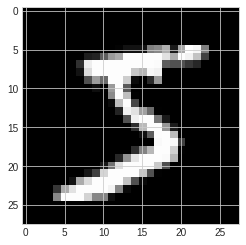

In [22]:
img = x_train[0]
print(img.shape)

plt.imshow(img, cmap='gray')
plt.show()

In [23]:
y_train[0]

5

#### 데이터 전처리 (Data Preprocessing)

In [24]:
def flatten_for_mnist(x):
  temp = np.zeros((x.shape[0], x[0].size))

  for idx, data in enumerate(x):
    temp[idx, :] = data.flatten()
  
  return temp

In [25]:
#normalization해주자.정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = flatten_for_mnist(x_train)
x_test = flatten_for_mnist(x_test)

print(x_train.shape)
print(x_test.shape)

#텐서플로에도 원핫인코딩있음.
y_train_ohe = tf.one_hot(y_train, depth=10).numpy()
y_test_ohe = tf.one_hot(y_test, depth=10).numpy()

print(y_train_ohe.shape)
print(y_test_ohe.shape)

#flatten으로 펴줬기 때문에 shape가 변했다. 

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [26]:
print(x_train[0].max(), x_train[0].min()) #자연스럽게 minmax스케일링 했다는데?
print(y_train_ohe[0])

1.0 0.0
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### 하이퍼 파라미터(Hyper Parameter)

In [27]:
epochs =2 
lr = 0.1
batch_size = 100
train_size = x_train.shape[0]

#### 사용되는 함수들(Util Functions)

In [28]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def mean_squared_error(pred_y, true_y):
  return 0.5 * (np.sum((true_y - pred_y)**2))

def MSE(y, pred_y): #뭔 MSE코드오류라는데 위의 코드가 틀린듯. 근데 강의는 그냥 진행됨.
  return np.mean(np.sum(np.square((y - pred_y))))

def cross_entropy_error(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1, -1)

  delta = 1e-7
  return -np.sum(true_y * np.log(pred_y + dleta))
  #로그함수에 0대입하면 무한대로 가버리니까, -무한대로 가지 않게 하는 아주 작은 델타값을 더해준다. 

def cross_entropy_error_for_batch(pred_y, true_y):#벳치의 경우 상정. 
#벳치사이즈로 구분해서 계산하다보면 베치 사이즈로 각 값들을 나눠줘야한다.
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1, -1)

  delta = 1e-7
  batch_size = pred_y.shape[0]
  return -np.sum(true_y * np.log(pred_y + dleta)) / batch_size 

def cross_entropy_error_for_bin(pred_y, true_y):
  return 0.5 * np.sum((-true_y * np.log(pred_y) - (1- true_y) * np.log(1-pred_y)))

def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

def diffrential_1d(f, x):
  eps = 1e-5 #작은 앱실론 값을 주고...
  diff_value = np.zeros_like(x) #크기는 x인데 내용물을 0으로 채운 배열하나 만들어주고...
  
  for i in range(x.shape[0]):
    temp_val = x[i]
    
    x[i] = temp_val + eps
    f_h1 = f(x)

    x[i] = temp_val - eps
    f_h2 = f(x)

    diff_value[i] = (f_h1 - f_h2) / (2 * eps)
    x[i] = temp_val

  return diff_value

def diffrential_2d(f, X):    #2차원은 대문자 쓴다는데
  if X.ndim == 1:
    return diffrential_1d(f,X)
  else:
    grad = np.zeros_like(X)

    for idx, x in enumerate(X):
      grad[idx] = differential_1d(f,x)

    return grad


#### 2층 신경망으로 구현

In [35]:
class MyModel():
  
  def __init__(self):

    def weight_init(input_nodes, hidden_nodes, output_units):
      np.random.seed(777)

      params = {}
      params['w_1'] = 0.01 * np.random.randn(input_nodes, hidden_nodes)
      params['b_1'] = np.zeros(hidden_nodes)
      params['w_2'] = 0.01 * np.random.randn(hidden_nodes, output_units)
      params['b_2'] = np.zeros(output_units)

      return params

    self.params = weight_init(784, 64, 10)

  def predict(self, x):
    W_1, W_2 = self.params['w_1'], self.params['w_2']
    B_1, B_2 = self.params['b_1'], self.params['b_2']

    A1 = np.dot(x, W_1) + B_1
    Z1 = sigmoid(A1)
    
    A2 = np.dot(Z1, W_2) + B_2
    pred_y = softmax(A2) #다층모델이므로 시그모이드말고 소프트맥스로 한다. 

    return pred_y

  def loss(self, x, true_y):
    pred_y = self.predict(x)
    return cross_entropy_error_for_bin(pred_y, true_y)

  #accuracy값 추가
  def accuracy(self, x, true_y):
    pred_y = self.predict(x)
    y_argmax = np.argmax(pred_y, axis=1)
    t_argmax = np.argmax(true_y, axis=1)

    accuracy = np.sum(y_argmax == t_argmax) / float(x.shape[0])

    return accuracy

  def get_gradient(self, x, t):
    
    def loss_grad(grad):
      return self.loss(x,t)

    grads = {}
    grads['w_1'] = diffrential_2d(loss_grad, self.params['w_1'])
    grads['b_1'] = diffrential_2d(loss_grad, self.params['b_1'])
    grads['w_2'] = diffrential_2d(loss_grad, self.params['w_2'])
    grads['b_2'] = diffrential_2d(loss_grad, self.params['b_2'])

    return grads

#### 모델 생성 및 학습
- 시간 많이 소요

In [38]:
#왜 오류난건지 모르겠음. 나중에 고치자 찌발. 

model = MyModel
train_loss_list = list()
train_acc_list = list()
test_acc_list = list()
iter_per_epoch = max(train_size / batch_size, 1)

start_time = time.time()
for i in tqdm(range(epochs)):
  batch_idx = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_idx]
  y_batch = y_train_ohe[batch_idx]

  grads = model.get_gradient(x_batch, y_batch)

  #가중치 업데이트
  for key in grad.keys():
    model.params[key] -= lr * grads[key]

  loss = model.loss(x_batch, y_batch)
  train_loss_list.append(loss)

  train_accuracy = model.accuracy(x_train, y_train_ohe)
  test_accuracy = model.accuracy(x_test, y_test_ohe)
  train_acc_list.append(train_accuracy)
  test_acc_list.append(test_accuracy)

  print("Epoch: {}, Cost: {}, Train Accuracy: {}, Test Accuracy: {}".format(i+1, loss, train_accuracy, test_accuracy))

  #formatted = f'Epoch: {i+1}, Cost: {loss}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}'

end_time = time.time()

print("총 학습 소요시간: {:.3f}s".format(end_time-start_time))



  0%|          | 0/2 [00:00<?, ?it/s]

TypeError: ignored

### 모델의 결과
- 모델은 학습이 잘 될 수도, 잘 안될 수도 있음

- 만약, 학습이 잘 되지 않았다면,  
  학습이 잘 되기 위해서 어떠한 조치를 취해야 하는가?
  - 다양한 학습관련 기술이 존재